# Задание

Подготовить исследование для компании и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. 



Датасет содержит следующие значения: 

&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

# Подготовка данных

In [ ]:
#Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import scipy.stats as st

In [ ]:
#Загрузим данные мегафона
df_megafon = pd.read_csv('megafon.csv', index_col=0)
df_megafon.head()

,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
user_id,,,,,,,,,,
1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


In [ ]:
#Переименнуем название столбцов для более удобной работы
df_megafon.columns = ['q1', 'q2', 'traffic', 'downlink', 'uplink', 'downlink_tcp',
                      'vs_download', 'vs_delay', 'wp_download', 'web_rtt']
df_megafon.head(3)

,q1,q2,traffic,downlink,uplink,downlink_tcp,vs_download,vs_delay,wp_download,web_rtt
user_id,,,,,,,,,,
1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485


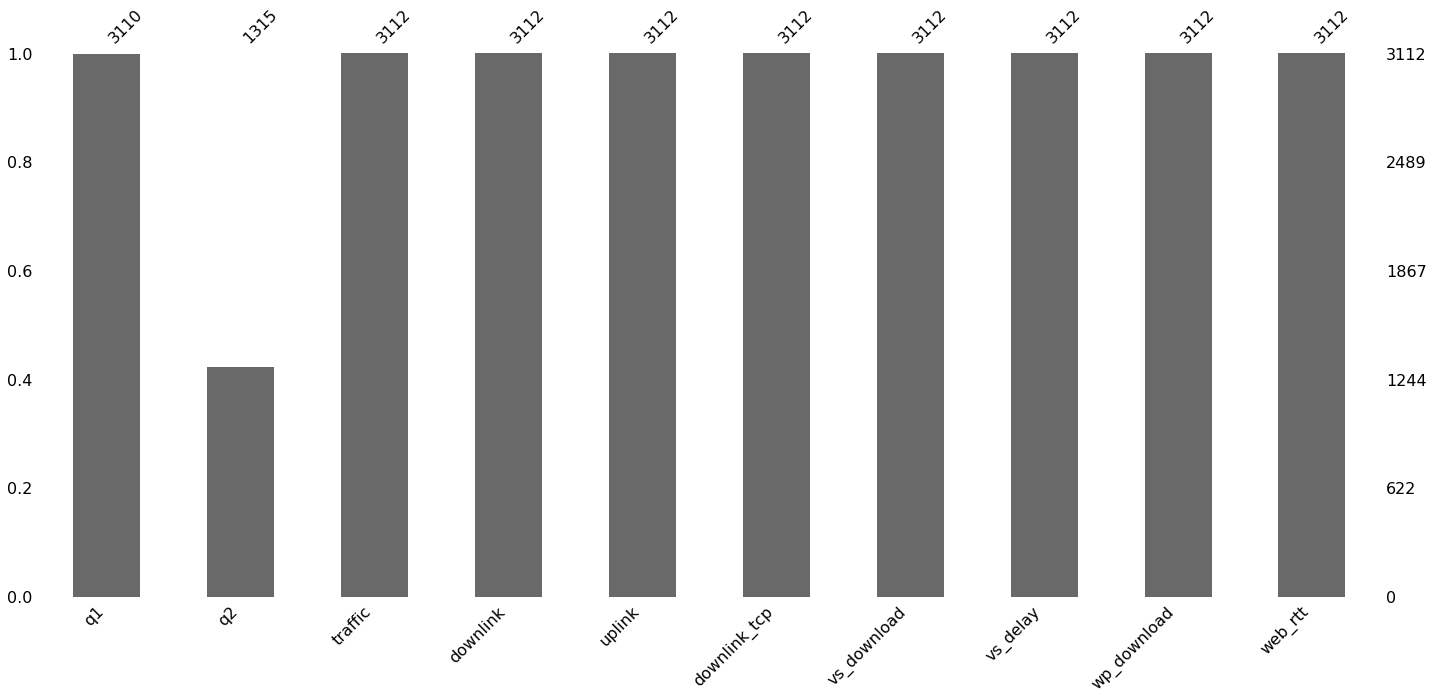

In [ ]:
#Проверим наличие пропущенных значений
msno.bar(df_megafon)

Почти все пропущенные значения находятся в ответе на второй вопрос, это логично, т.к. не всем опрошенным задавали второй вопрос. Также есть 2 пропущенных значения в первом вопросе.

In [ ]:
#Выведим типы данных в столбцах
df_megafon.dtypes

q1               object
q2               object
traffic         float64
downlink        float64
uplink          float64
downlink_tcp    float64
vs_download     float64
vs_delay          int64
wp_download     float64
web_rtt           int64
dtype: object

In [ ]:
df_megafon.describe()

,traffic,downlink,uplink,downlink_tcp,vs_download,vs_delay,wp_download,web_rtt
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,406.282339,2220.774023,170.702381,1.834518,5728.806848,2107.596080,2100.258901,194.195051
std,220.593815,2629.824405,204.031286,2.074593,5161.475235,1582.423057,2062.509549,267.387914
min,100.026680,13.260000,6.110000,0.050000,0.000000,239.000000,0.000000,0.000000
25%,214.261193,652.297500,70.735000,0.720000,2324.550000,1280.000000,1018.002500,74.000000
50%,363.999720,1404.230000,119.435000,1.300000,4436.500000,1672.000000,1670.695000,118.000000
75%,572.524325,2823.645000,210.617500,2.240000,7611.440000,2312.000000,2519.987500,207.000000
max,887.078270,39817.640000,4141.850000,31.200000,58566.030000,21392.000000,35603.970000,3471.000000


In [ ]:
df_megafon.describe(include=[np.object])

,q1,q2
count,3110,1315
unique,49,51
top,10,3
freq,846,190


**Первые очевидные результаты и выводы, которые мы можем сделать:**
* Большое количество опрошеных высоко оценили качество связи, более 25% поставили оценку 10.
* На вопросы уникальных ответов больше, чем предпологает вопрос.
* Наиболее популярным ответом на второй вопрос является плохое качество связи
* Большая разница между средним веб пингом 194 и медианным 118, может означать, что существует небольшое количество пользователей с большим пингом. 

In [ ]:
#Посмотрим ответы на первый вопрос
df_megafon['q1'].value_counts()

10                                                                      846
1                                                                       532
3                                                                       325
8                                                                       291
9                                                                       238
5                                                                       234
7                                                                       200
2                                                                       168
4                                                                       123
6                                                                       101
0                                                                        10
Нет                                                                       2
1, 3                                                                      2
5, 6        

Есть небольшое количество ответов отличающихся от предполагаемых, т.к. их около 1% удалим строчки содержащие такие ответы, а 0 изменим на 1.

In [ ]:
df_megafon['q1'][df_megafon['q1']=='0']='1'
df_megafon = df_megafon[df_megafon['q1'].isin(('1','2','3','4','5','6','7','8','9','10'))]
df_megafon['q1'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10    846
1     542
3     325
8     291
9     238
5     234
7     200
2     168
4     123
6     101
Name: q1, dtype: int64

In [ ]:
#Посмотрим ответы на второй вопрос
df_megafon['q2'].value_counts()

3                   190
4                   170
1                   168
1, 3                121
3, 4                 85
1, 3, 4              76
7                    64
1, 4                 56
3, 4, 5              45
1, 2, 3              44
1, 3, 4, 5           40
4, 5                 30
1, 4, 5              27
1, 2, 3, 4, 5        27
1, 2                 22
1, 2, 3, 4           18
2, 3                 12
1, 2, 4              11
2, 3, 4              11
2                    11
6                    10
5                     9
3, 5                  8
1, 5                  7
1, 2, 4, 5            4
1, 2, 3, 5            4
2, 4                  4
3, 4, 5, 7            3
2, 3, 4, 5            3
1, 2, 5               3
1, 3, 5               3
1, 4, 7               3
1, 3, 7               2
1, 3, 4, 5, 7         2
2, 4, 5               2
3, 4, 7               2
1, 2, 3, 4, 5, 6      2
1, 3, 4, 7            2
3, 7                  2
5, 6                  1
10                    1
1, 2, 34        

Во многих ответах содержится не 1 проблема, а несколько. Создадим новый датафрейм, в котором посчитаем количество проблем, и добавим описание проблемы.

In [ ]:
count = [0]*7
for i in df_megafon['q2'].dropna():
  for j in i:
    if j in ('1','2','3','4','5','6','7'):
      j = int(j)
      count[j-1] += 1
count
q2 = pd.DataFrame(index=(1,2,3,4,5,6,7))
q2['problem'] = ['Недозвоны, обрывы при звонках', 'Время ожидания гудков при звонке',
                 'Плохое качество связи в зданиях', 'Медленный мобильный Интернет',
                 'Медленная загрузка видео', 'Затрудняюсь ответить',
                 'Свой вариант']
q2['count'] = count
q2

,problem,count
1,"Недозвоны, обрывы при звонках",648
2,Время ожидания гудков при звонке,185
3,Плохое качество связи в зданиях,706
4,Медленный мобильный Интернет,626
5,Медленная загрузка видео,222
6,Затрудняюсь ответить,13
7,Свой вариант,87


Визуализируем данные с помощью круговой диаграммы, чтобы увидеть какие проблемы отмечают чаще других.

Около 80% всех проблем:
* плохое качество связи в зданиях 28.4%. 
* недозвоны, обрывы при звонках 26.1%. 
* медленный мобильный интернет 25.2%.

Проблем связанных с интернетом около 34% 

**Формулирование вопросов к данным или статистических гипотез о данных:**
* Верно ли, что у группы, отметившей проблемой медленный мобильный интернет, и у группы, не отметившей эту проблему значение средней скорости «к абоненту»  статистически достоверно различаются?
* У группы, отметившей проблемой медленная загрузка видео, и у группы, не отметившей эту проблему, какие показатели статистически различаются: скорость загрузки потокового видео или задержка старта воспроизведения видео?
* На основании данных какое самое вероятное значение частоты переотправок пакетов «к абоненту» у группы, отметившей проблемы связанные с интернетом? Каков доверительный интервал для неё?

# Средняя скорость «к абоненту»

Верно ли, что у группы, отметившей проблемой медленный мобильный, и у группы, не отметившей эту проблему значение средней скорости «к абоненту»  статистически достоверно различаются?

Ответ на этот вопрос покажет, влияет ли данная величина на оценку пользоватеелей. Это поможет компании  выбрать наиболее важные задачи для технического отдела.

In [ ]:
#Заменим пропущенные значения на 0, для более удобной работы с данными
df_megafon = df_megafon.fillna('0') 

In [ ]:
#Создадим новый датафрейм для проверки гипотезы
df_downlink = df_megafon[['q2','downlink']].copy()
df_downlink['group'] = ['A' if '4' in i else 'B' for i in df_downlink['q2']]
df_downlink

,q2,downlink,group
user_id,,,
1,0,360.13,B
2,4,3023.54,A
3,4,790.96,A
4,3,2590.97,B
5,"2, 3, 4",731.61,A
...,...,...,...
3108,"1, 4, 5",1045.70,A
3109,"1, 3, 4, 5",670.32,A
3110,0,590.29,B


Посмотрим на распределение значений в зависимости от группы, для этого построим гистограмму.

In [ ]:
#Создадим функцию выводящию базовые метрики и гистограмму.
def basic_research(df, column):
  print('Базовые метрики')
  print(df.groupby('group')[column].describe())
  sns.histplot(df.loc[df['group']=='A', column], label='A', color='red', stat='density')
  sns.histplot(df.loc[df['group']=='B', column], label='B', color='blue', stat='density')
  plt.legend()
  plt.title('Распределение метрики')
  plt.xlabel(column)

Базовые метрики
        count         mean          std  ...       50%        75%       max
group                                    ...                               
A       626.0  1768.408930  2056.511905  ...  1110.715  2193.5925  18573.35
B      2442.0  2329.101978  2730.242010  ...  1509.940  2965.8375  39817.64

[2 rows x 8 columns]


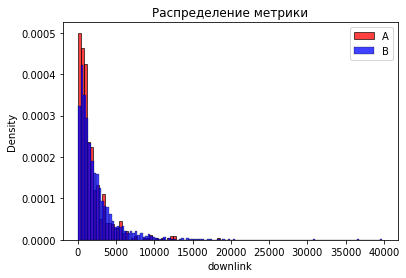

In [ ]:
basic_research(df = df_downlink, column = 'downlink')

Заметны различия между данными.

Сформулируем нулевую и альтернативную гипотезы:
* Нулевая гипотеза: Значение средней скорости «к абоненту» у группы, отметившей проблемой медленный мобильный интернет, и у группы, не отметившей эту проблему, не отличается.
* Альтернативная гипотеза: Значение средней скорости «к абоненту» у группы, отметившей проблемой  медленный мобильный интернет меньше, чем у группы, не отметившей эту проблему.

Проверим гипотезы с помощью бутстрэпа.

In [ ]:
#Создадим функцию для бутстрэпа
def bootstrap(dat_a, dat_b, n=100, N_TRIAL = 1000,func = np.mean):
  res = []
  p1 = []
  p2 = []
  #bootstrap
  for _ in range(N_TRIAL):
    s1 = np.random.choice(dat_a, size = (n,))
    s2 = np.random.choice(dat_b, size = (n,))
    p1.append(func(s1))
    p2.append(func(s2))
    res.append(func(s1) - func(s2))
  #Построение гистограмм
  ax = sns.distplot(p1,label = 'A')
  sns.distplot(p2,ax = ax,label = 'B')
  ax.legend(['A','B'])
  plt.title('распределение значений')
  #Отметим квантеили 0.975 для группы A, 0.25 для группы B, и медианны для обоих групп 
  ax.axvline(np.percentile(p1,97.5),linestyle = '-',color='g')
  ax.axvline(np.percentile(p1,50),linestyle = '-',color='r')

  ax.axvline(np.percentile(p2,2.5),linestyle = '--',color='g')
  ax.axvline(np.percentile(p2,50),linestyle = '--',color='r')
  print()
  return res

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



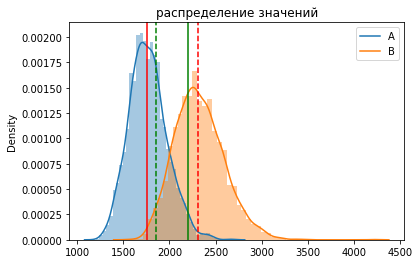

In [ ]:
differences = bootstrap(df_downlink.query("group=='A'")['downlink'], 
                      df_downlink.query("group=='B'")['downlink'], N_TRIAL = 3000)

In [ ]:
#Посчитаем среднюю разницу
diff = df_downlink.query("group=='A'")['downlink'].mean() -  df_downlink.query("group=='B'")['downlink'].mean()

Text(0.5, 1.0, 'Распределение разницы')

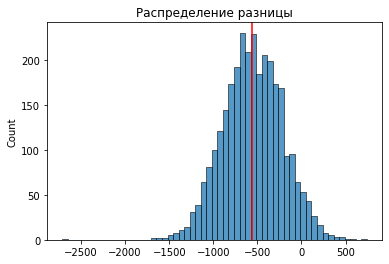

In [ ]:
#Построим гистограмму распределение разницы 
sns.histplot(differences)
plt.axvline(diff, linestyle = '-',color='r')
plt.title('Распределение разницы')

In [ ]:
#Расчитаем p-value
((differences - np.mean(differences)) <= diff).sum()/len(differences)

0.045

In [ ]:
np.mean(differences)

-555.9635589333334

Вывод:

На основании имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

Средняя скорость «к абоненту» у группы, отметившей проблемой медленный мобильный интернет меньше, чем у группы, не отметившей эту проблему в среднем на 556 Kbps.

# Медленная загрузка видео,

У группы, отметившей проблемой медленная загрузка видео, и у группы, не отметившей эту проблему, какие показатели статистически различаются: скорость загрузки потокового видео или задержка старта воспроизведения видео?

Ответ на этот вопрос поможет выбрать метрику, которая наиболее сильно беспокоит пользователей, что позволит техническому отделу компании  выбрать наиболее важную задачу.

In [ ]:
#Создадим новый датафрейм
df_video = df_megafon[['q2', 'vs_download', 'vs_delay']].copy()
df_video['group'] = ['A' if '5' in i else 'B' for i in df_video['q2']]
df_video

,q2,vs_download,vs_delay,group
user_id,,,,
1,0,1859.15,2309,B
2,4,667.47,2080,B
3,4,1079.60,6367,B
4,3,7053.81,3218,B
5,"2, 3, 4",4550.38,1767,B
...,...,...,...,...
3108,"1, 4, 5",4523.66,1468,A
3109,"1, 3, 4, 5",1711.54,2780,A
3110,0,3182.83,2195,B


Воспользуемся готовой функцией, для вывода базовых метрик и построения гистограммы.

Базовые метрики
        count         mean          std  ...       50%        75%       max
group                                    ...                               
A       222.0  3950.257072  3822.730728  ...  2927.745  4721.7400  26367.73
B      2846.0  5870.482006  5221.069715  ...  4583.335  7767.2325  58566.03

[2 rows x 8 columns]


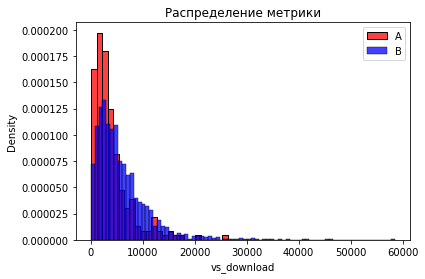

In [ ]:
basic_research(df = df_video, column = 'vs_download')

Базовые метрики
        count         mean          std  ...     50%      75%      max
group                                    ...                          
A       222.0  2305.743243  1570.518530  ...  1863.0  2639.50  15280.0
B      2846.0  2096.451511  1590.017484  ...  1662.0  2285.75  21392.0

[2 rows x 8 columns]


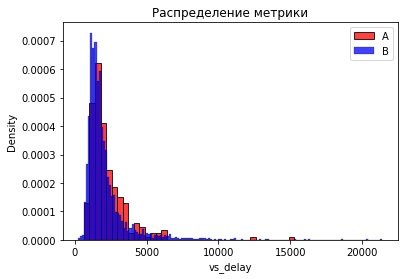

In [ ]:
basic_research(df = df_video, column = 'vs_delay')

Задержка старта воспроизведения видео различается слабее, чем скорость загрузки видео. Проведем статистический тест для последней метрики.

Сформулируем нулевую и альтернативную гипотезы:
* Нулевая гипотеза: Значение скорости загрузки потокового видео у группы, отметившей проблемой медленный мобильный интернет, и у группы, не отметившей эту проблему, не отличается.
* Альтернативная гипотеза: Значение скорости загрузки потокового видео у группы, отметившей проблемой  медленный мобильный интернет меньше, чем у группы, не отметившей эту проблему.

проверим гипотезы с помощью бутстрэпа

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



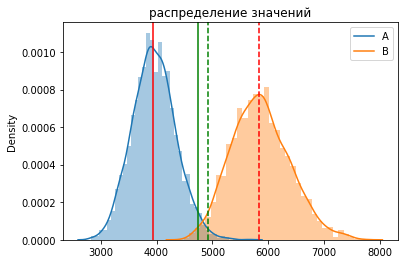

In [ ]:
#Воспользуемся уже заданной ранее функцией
differences = bootstrap(df_video.query("group=='A'")['vs_download'], 
                      df_video.query("group=='B'")['vs_download'], N_TRIAL = 3000)

Text(0.5, 1.0, 'Распределение разницы')

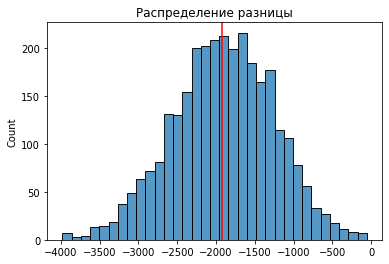

In [ ]:
#Посчитаем среднюю разницу и построим гистограмму распределения разницы
diff = df_video.query("group=='A'")['vs_download'].mean() -  df_video.query("group=='B'")['vs_download'].mean()
sns.histplot(differences)
plt.axvline(diff, linestyle = '-',color='r')
plt.title('Распределение разницы')

In [ ]:
#Расчитаем p-value
((differences - np.mean(differences)) <= diff).sum()/len(differences)

0.003

In [ ]:
diff

-1920.2249342525956

Вывод:

На основании имеющихся данных, на уровне значимости 1% (уровне доверия 99%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

Скорость загрузки потокового видео у группы, отметившей проблемой медленный мобильный интернет меньше, чем у группы, не отметившей эту проблему в среднем на 1920 Kbps.

# Частота переотправок пакетов «к абоненту»

На основании данных какое самое вероятное значение частоты переотправок пакетов «к абоненту» у группы, отметившей проблемы связанные с интернетом? Каков доверительный интервал для неё?

Ответ на этот вопрос покажет, стоит ли техническому отделу компании  уделять время для улучшения данной метрики.

In [ ]:
#Создадим новый датафрейм
df_tcp = df_megafon[['q2', 'downlink_tcp']].copy()
df_tcp['group'] = ['A' if ('5' in i) | ('4' in i) else 'B' for i in df_tcp['q2']]
df_tcp = df_tcp.query("group =='A'")
df_tcp

,q2,downlink_tcp,group
user_id,,,
2,4,1.27,A
3,4,1.79,A
5,"2, 3, 4",1.15,A
7,"4, 5",1.98,A
9,"1, 3, 4",0.84,A
...,...,...,...
3101,"1, 2, 4",1.64,A
3102,4,0.70,A
3105,"1, 3, 4",3.86,A


Базовые метрики
       count      mean       std   min   25%   50%   75%    max
group                                                          
A      663.0  2.112911  2.110257  0.06  0.84  1.51  2.55  19.17


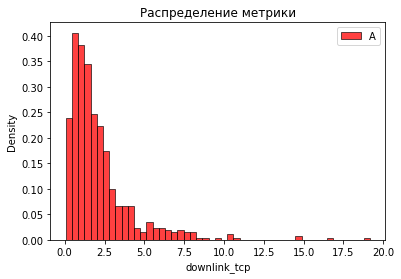

In [ ]:
#Посмотрим на базовые метрики и распределение данных с помощью гистограммы и boxplot
basic_research(df = df_tcp, column = 'downlink_tcp')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



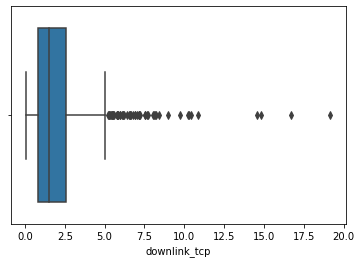

In [ ]:
ax = sns.boxplot(df_tcp['downlink_tcp'])

In [ ]:
#Функция для нахождения доверительного интервала среднго значения
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m, m+h

In [ ]:
mean_confidence_interval(df_tcp['downlink_tcp'])

(1.9519867592905178, 2.1129110105580695, 2.2738352618256212)

Вывод: для большенства пользователей переотправка пакетов не заметна, но у не большой части данное значение большое, возможно это связано с проблемами у самих пользователей.

Заключение:
* Наиболее важными параметрами оказались: средняя скорость «к абоненту» и скорость загрузки потокового видео.
* Наименее важным частота переотправок пакетов «к абоненту».
* Техническому отделу компании , в первую очередь стоит улучшить среднюю скорость «к абоненту» и скорость загрузки потокового видео. 
* Частота переотправок пакетов «к абоненту» является наименее важной проблемой.